In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd import data

In [3]:
import geopandas as gpd

In [4]:
from shapely.geometry import MultiPolygon, MultiLineString, Polygon

In [5]:
from shapely.ops import polygonize

In [6]:
db = data.Base()

Initializing database connection...
Database connected!


In [7]:
coast = db.select('coast')

<AxesSubplot:>

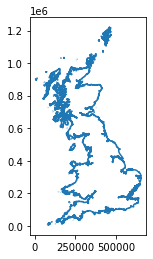

In [8]:
coast.plot()

In [9]:
multiline = MultiLineString(list(coast.geometry.values))

In [10]:
british_isles = MultiPolygon(polygonize(multiline))

In [11]:
geoseries = gpd.GeoSeries(list(british_isles.geoms))

In [12]:
isles = gpd.GeoDataFrame(
    geometry=geoseries[
        geoseries.area.sort_values(ascending=False).index])

In [13]:
isles.to_postgis('isles', db.engine, if_exists='replace')